In [36]:
# STEP 0 : Basic settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [37]:
# STEP 1. Load the data & basic overview

# load data
df = pd.read_csv('/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv')

# Display the dataset first 5 rows
df.head(5)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [38]:
# Display variable info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [39]:
# Summary statistics for numerical variables
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [40]:
# Summary for non-numeric variables
df.describe(include = 'object')

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Reason for cancelling by Customer,Driver Cancellation Reason,Incomplete Rides Reason,Payment Method
count,150000,150000,150000,150000,150000,150000,150000,150000,10500,27000,9000,102000
unique,365,62910,148767,5,148788,7,176,176,5,4,3,5
top,2024-11-16,17:44:57,"""CNR6337479""",Completed,"""CID6715450""",Auto,Khandsa,Ashram,Wrong Address,Customer related issue,Customer Demand,UPI
freq,462,16,3,93000,3,37419,949,936,2362,6837,3040,45909


In [41]:
# Display row numbers and column numbers
print(f'Row number : {df.shape[0]} \nColumn number: {df.shape[1]}')

Row number : 150000 
Column number: 21


In [42]:
# Check missing values
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [43]:
# STEP 2. DATA TRANFORMATION

# Convert Date and Time into a single DateTime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where DateTime could not be created
before_rows = df.shape[0]
df = df.dropna(subset=['DateTime'])
after_rows = df.shape[0]

print(f"Dropped {before_rows - after_rows} rows with invalid Date/Time.")

# Separate Month, day, hour and year from 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['DateTime'].dt.hour

# Create day name column (Monday, Tuesday..)
df['DayName'] = df['Date'].dt.day_name()

# Display converting results
df[['DateTime','Date', 'Year', 'Month','Day','DayName', 'Hour']].head(3)# STEP 9: VISUALIZATION 4 – BOOKING VALUE DISTRIBUTION


Dropped 0 rows with invalid Date/Time.


,DateTime,Date,Year,Month,Day,DayName,Hour
0,2024-03-23 12:29:38,2024-03-23,2024,3,23,Saturday,12
1,2024-11-29 18:01:39,2024-11-29,2024,11,29,Friday,18
2,2024-08-23 08:56:10,2024-08-23,2024,8,23,Friday,8


In [44]:
# STEP 3. DATA cleaning

# Strip extra spaces from some categorical columns
for col in ['Booking Status', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Payment Method']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

# Make sure numeric columns are numeric and clean basic issues
numeric_columns = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance',
                   'Driver Ratings', 'Customer Rating']

for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Ratings should be between 1 and 5
        if col in ['Driver Ratings', 'Customer Rating']:
            df.loc[(df[col] < 1) | (df[col] > 5), col] = np.nan

        # Booking value and distance should not be negative
        if col in ['Booking Value', 'Ride Distance']:
            df.loc[df[col] < 0, col] = np.nan

print("Basic cleaning completed.")


Basic cleaning completed.


In [45]:
# STEP 4. Create Metrics

# Total bookings
totalBookings = len(df)

# Rate of complete ride 
completed_Rate = (df['Booking Status'] == 'Completed').mean()*100

# Rate of cancel by driver & customer
cancel_by_driver_rate = (df['Booking Status'] == 'Cancelled By Driver').mean() * 100
cancel_by_customer_rate = (df['Booking Status'] == 'Cancelled By Customer').mean() * 100


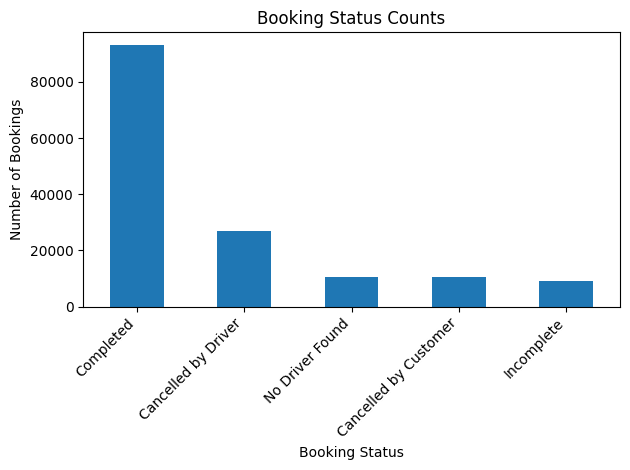

In [46]:
# STEP 6: VISUALIZATION 1 – BOOKING STATUS COUNTS

plt.figure()
df['Booking Status'].value_counts().plot(kind='bar')
plt.title('Booking Status Counts')
plt.xlabel('Booking Status')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

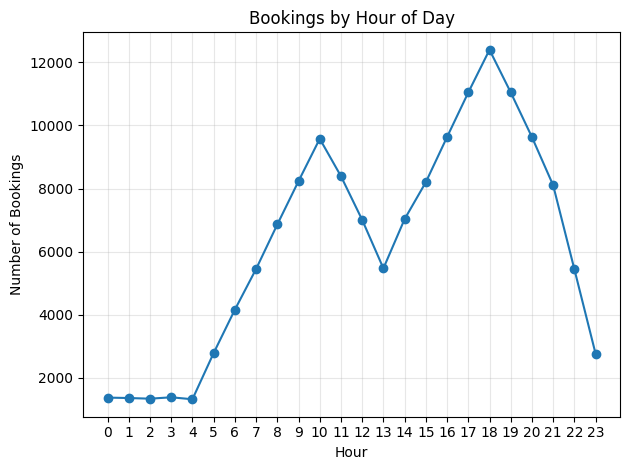

In [47]:
# STEP 7: VISUALIZATION 2 – BOOKINGS BY HOUR OF DAY

plt.figure()
df.groupby('Hour').size().plot(kind='line', marker='o')
plt.title('Bookings by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Bookings')
plt.grid(alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

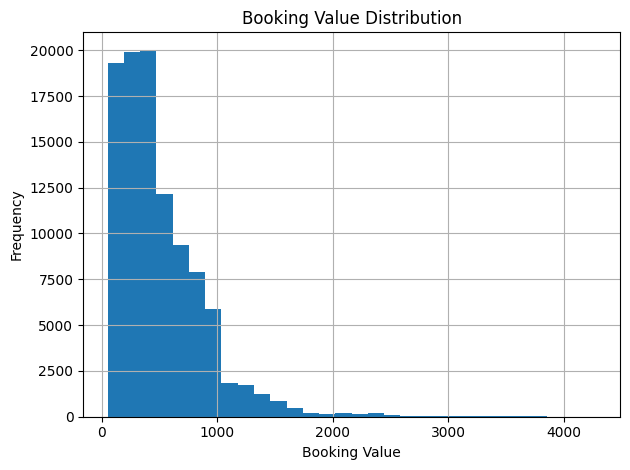

In [48]:
# STEP 9: VISUALIZATION 4 – BOOKING VALUE DISTRIBUTION

plt.figure()
df['Booking Value'].dropna().hist(bins=30)
plt.title('Booking Value Distribution')
plt.xlabel('Booking Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Payment Method
UPI            45.01
Cash           24.87
Uber Wallet    12.04
Credit Card    10.01
Debit Card      8.08
Name: proportion, dtype: float64


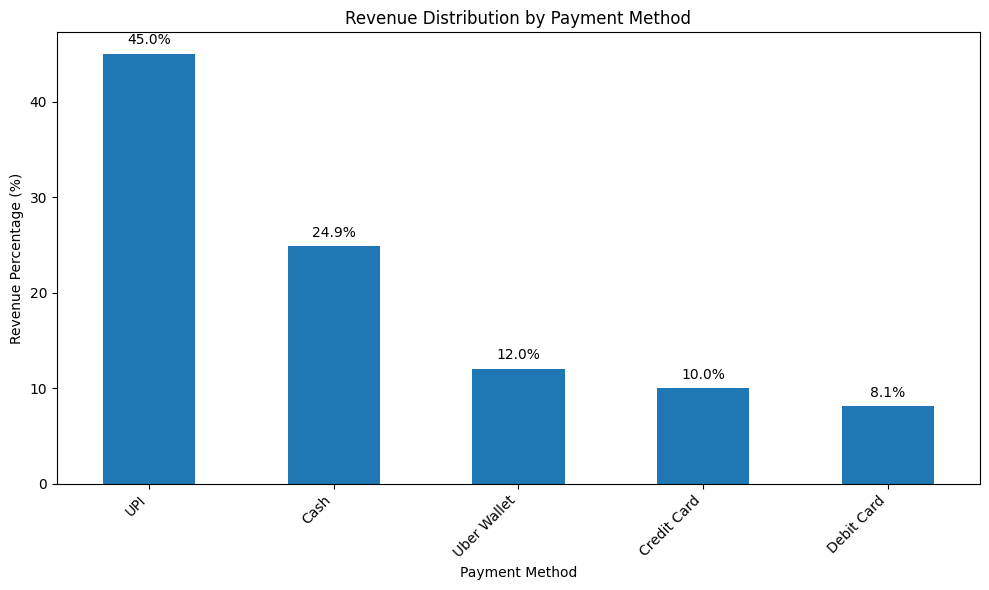

In [58]:
# STEP 10: VISUALIZATION 5 – Revenue Distribution by Payment Method

# Data cleaning
df_clean = df[
    (df['Payment Method'].notna()) &  # remove NaN
    (df['Payment Method'] != 'nan')    # remove string 'nan'  
]

# Calculate revenue_percentages
payment_percent = df_clean['Payment Method'].value_counts(normalize=True) * 100
print(payment_percent.round(2))

# bar chart
fig, ax = plt.subplots(figsize=(10, 6))
payment_percent.plot(kind='bar', ax=ax)

# adding labels
for i, (idx, value) in enumerate(payment_percent.items()):
    ax.text(i, value + 1, f'{value:.1f}%', ha='center')

ax.set_xlabel('Payment Method')
ax.set_ylabel('Revenue Percentage (%)')
ax.set_title('Revenue Distribution by Payment Method')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Reason for cancelling by Customer
Wrong Address                                   22.50
Change of plans                                 22.41
Driver is not moving towards pickup location    22.24
Driver asked to cancel                          21.86
AC is not working                               11.00
Name: proportion, dtype: float64


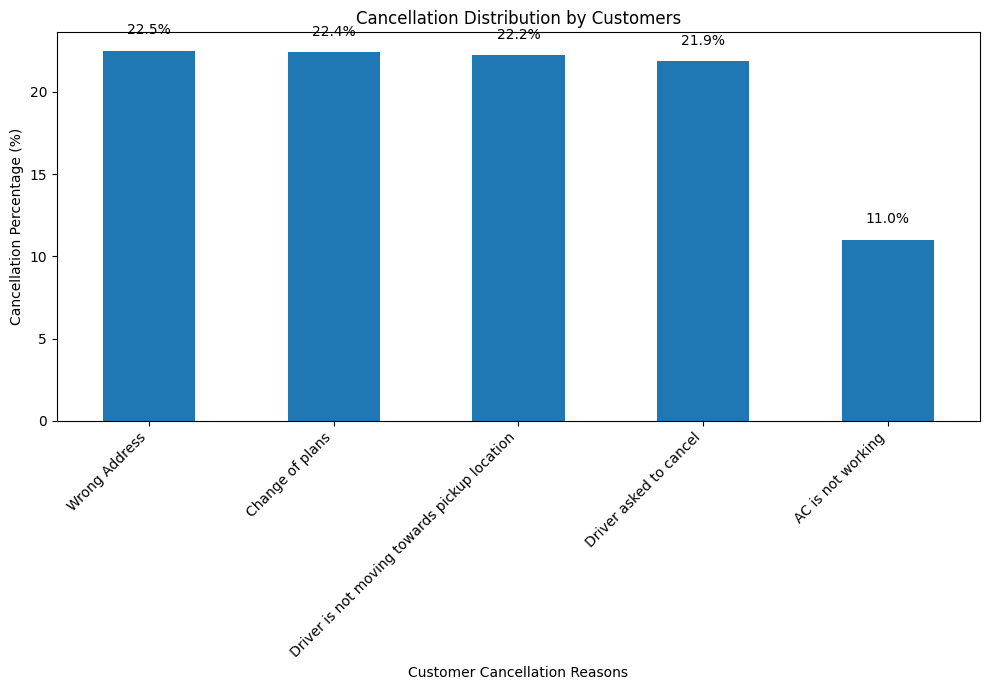

In [73]:
# Cancellation patterns : Customer Cancellation Reasons

# Calculate canceliation percentages
customerCancel_percent = df['Reason for cancelling by Customer'].value_counts(normalize=True) * 100
print(customerCancel_percent.round(2))

# bar chart
fig, ax = plt.subplots(figsize=(10, 7))
customerCancel_percent.plot(kind='bar', ax=ax)

# adding labels
for i, (idx, value) in enumerate(customerCancel_percent.items()):
    ax.text(i, value + 1, f'{value:.1f}%', ha='center')

ax.set_xlabel('Customer Cancellation Reasons')
ax.set_ylabel('Cancellation Percentage (%)')
ax.set_title('Cancellation Distribution by Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Driver Cancellation Reason
Customer related issue                 25.32
The customer was coughing/sick         25.00
Personal & Car related issues          24.91
More than permitted people in there    24.76
Name: proportion, dtype: float64


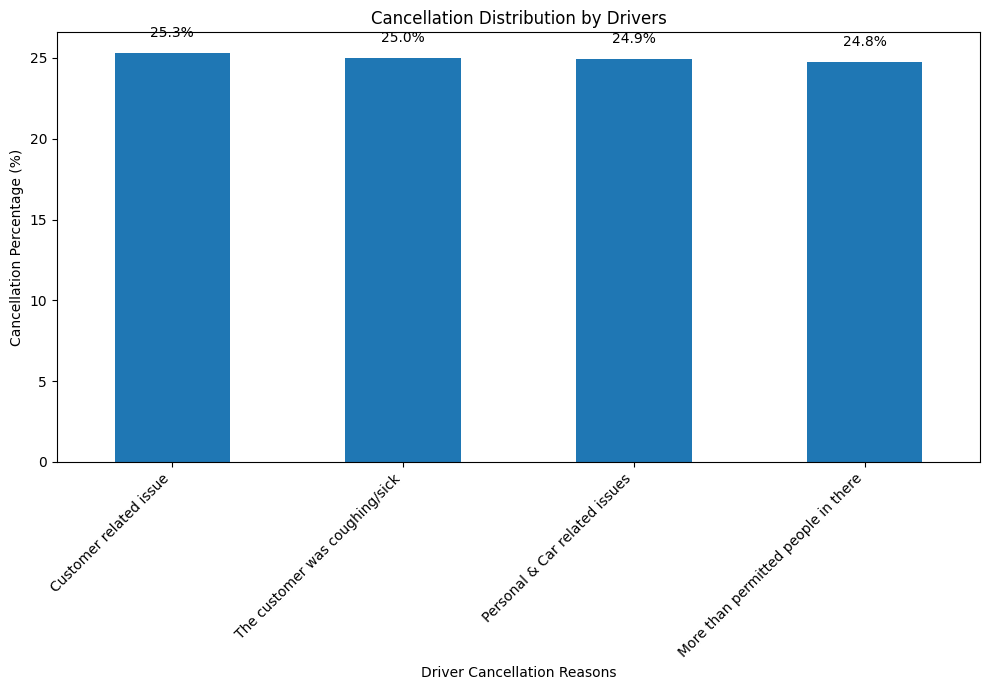

In [74]:
# Cancellation patterns : Driver Cancellation Reasons

# Calculate cancellation percentages
driverCancel_percent = df['Driver Cancellation Reason'].value_counts(normalize=True) * 100
print(driverCancel_percent.round(2))

# bar chart
fig, ax = plt.subplots(figsize=(10, 7))
driverCancel_percent.plot(kind='bar', ax=ax)

# adding labels
for i, (idx, value) in enumerate(driverCancel_percent.items()):
    ax.text(i, value + 1, f'{value:.1f}%', ha='center')

ax.set_xlabel('Driver Cancellation Reasons')
ax.set_ylabel('Cancellation Percentage (%)')
ax.set_title('Cancellation Distribution by Drivers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Vehicle Type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
eBike            10557
Uber XL           4449
Name: count, dtype: int64